## CSE 377 HW 10 - Active Contour

(1) Read in an image (a synthesized image is provided)
(2) Manually select initial points along the object boundary
(3) Run the iterative active contour algorithm until convergence.

In [1]:
# Importing the required libraries and features to perform the 
# active contour assignment. Refrenced the Scikit-Image document page
# for the Active Contour Model.

import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour

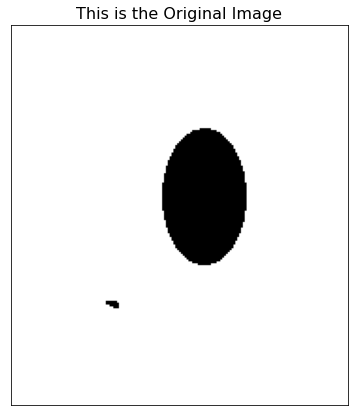

In [2]:
# Reading the image SampleImage.png into a variable, img.

img = plt.imread("SampleImage.png")

# Displaying the original image that we are working with.

fig, ax = plt.subplots(figsize=(7, 7))
plt.title('This is the Original Image', size=16)
ax.imshow(img, cmap=plt.cm.gray)
ax.set_xticks([])
ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])
plt.show()

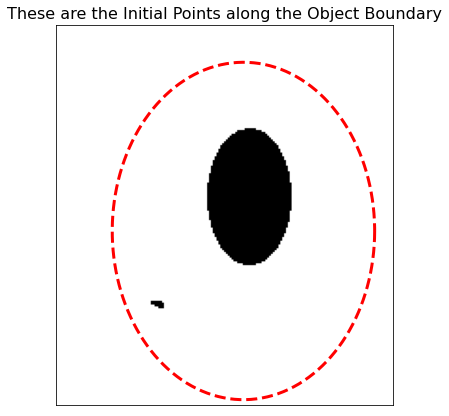

In [3]:
# Initializing the initial snake, there are 300 equally spaced angles 
# from 0 to 2*pi radians. The radius is of 60 pixels, while the center is
# at the point (100, 70). init_snake will be the array that stores the
# initial points of the iterative active contour program.

sample = np.linspace(0, 2*np.pi, 300)
radius = 60 + 90*np.sin(sample) + 50
center = 100 + 70*np.cos(sample)
init_snake = np.array([radius, center]).T

# Plotting the manually selected initial points along the object boundary,
# which ecompasses both objects, the larger oval object and the smaller object
# to its lower left position.
fig, ax = plt.subplots(figsize=(7, 7))
plt.title('These are the Initial Points along the Object Boundary', size=16)
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init_snake[:, 1], init_snake[:, 0], '--r', lw=3)
ax.set_xticks([])
ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])
plt.show()

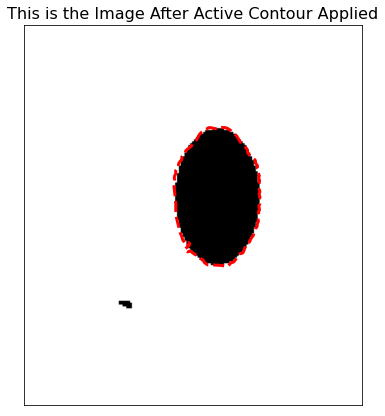

In [4]:
# Using the active_contour feature from the scikit-image library.
# Setting certain parameters that allows for the resulting snake
# to fully capture the outline of the object that we want. 

snake = active_contour(gaussian(img, 3, preserve_range=False),
                       init_snake, alpha=0.01, beta=10, gamma=0.001)

# Plotting the resulting snake after applying the active_contour algorithm
# to the initial points we chose from the previous cell.

fig, ax = plt.subplots(figsize=(7, 7))
plt.title('This is the Image After Active Contour Applied', size=16)
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(snake[:, 1], snake[:, 0], '--r', lw=3)
ax.set_xticks([])
ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])
plt.show()

# We can observe how the active contour alogrithm did its job pretty well.
# Note, this is only due to the parameters we gave the active_contour constructor,
# which is after many diffent tests and trials.